# Boxplots with cpu

In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from helpers.load_data import (
    clean_column_names,
    get_data_with_cpu,
    get_experiments_paths,
    trim_experiment,
)
from helpers.regression import (
    draw_regression_graph,
    fit_regression,
)

experiments_path = '../../data'

In [2]:
experiment_name = 'linpack_12x20'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)
df = trim_experiment(df, 8)
df

,cbtool_time,app_latency,app_throughput,app_throughput_inv,cpu,memory,instances_n
0,1604718657,NaN,34.7990,0.028736,2291.000000,3.683086e+09,1.0
1,1604718709,NaN,34.9965,0.028574,2253.000000,3.687117e+09,1.0
2,1604718761,NaN,34.7813,0.028751,2255.000000,3.683377e+09,1.0
3,1604718813,NaN,34.7475,0.028779,2269.000000,3.680690e+09,1.0
4,1604718866,NaN,34.5528,0.028941,2246.000000,3.679691e+09,1.0
...,...,...,...,...,...,...,...
118,1604727826,NaN,12.9666,0.077121,11997.333333,9.886259e+09,8.0
119,1604727972,NaN,12.8573,0.077777,12006.250000,9.386434e+09,8.0
120,1604728104,NaN,14.0751,0.071047,12049.000000,9.458713e+09,8.0
121,1604728243,NaN,13.6398,0.073315,12033.666667,9.057538e+09,8.0


<AxesSubplot:title={'center':'cpu'}, xlabel='instances_n'>

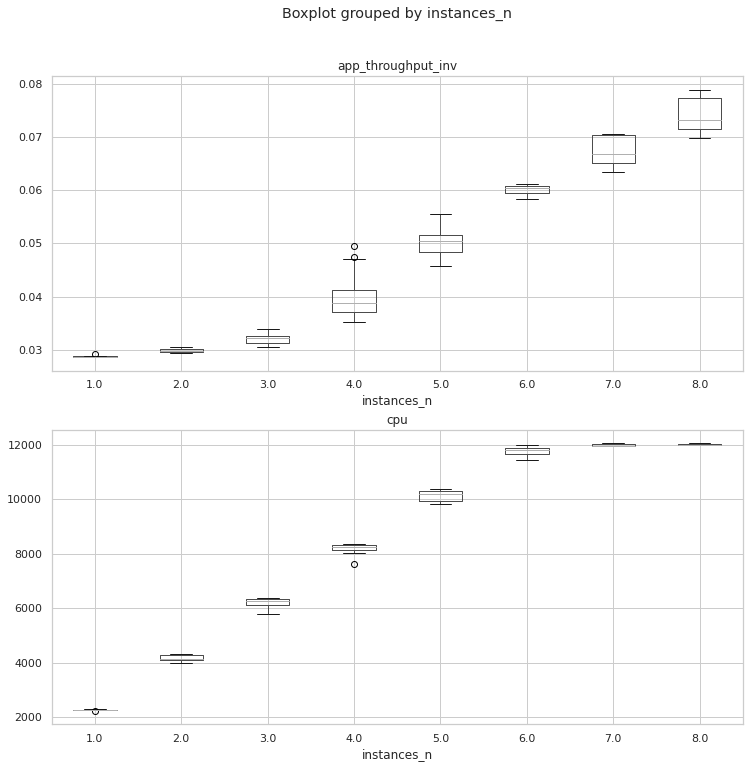

In [3]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=False, figsize=(12,12))
df.boxplot(column='app_throughput_inv', by='instances_n', grid=True,
                 meanline=False, showmeans=False, showcaps=True, showbox=True, showfliers=True,
                 ax=ax1)
df.boxplot(column='cpu', by='instances_n', grid=True,
                 meanline=False, showmeans=False, showcaps=True, showbox=True, showfliers=True,
                 ax=ax2)

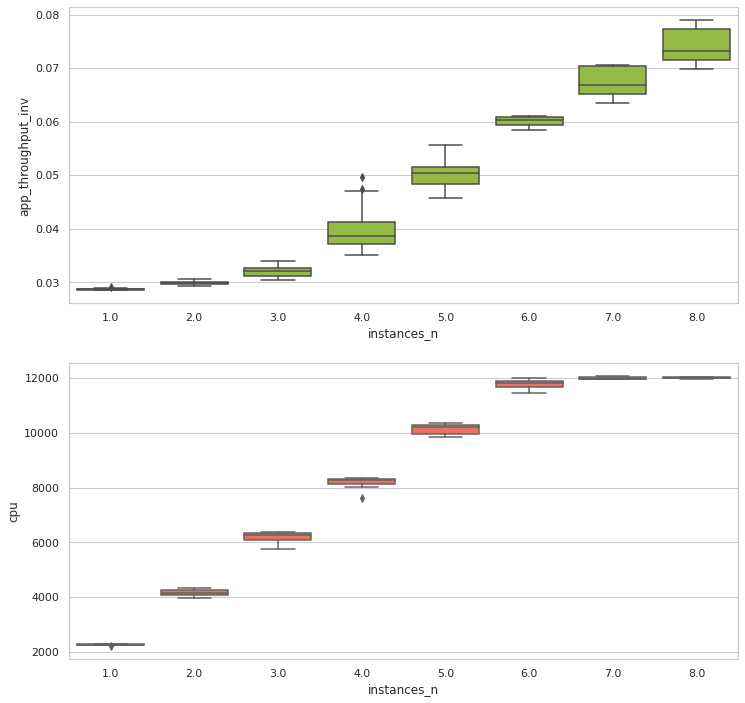

In [4]:
sns.set_theme(style="whitegrid")


def boxplot_two(var_1: str, var_2: str, df: pd.DataFrame, figsize=figsize):
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=False, figsize=figsize)
    sns.boxplot(x='instances_n', y=var_1, data=df, ax=ax1, color="yellowgreen")
    sns.boxplot(x='instances_n', y=var_2, data=df, ax=ax2, color='tomato')


boxplot_two('app_throughput_inv', 'cpu', df)

/home/godul/.local/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


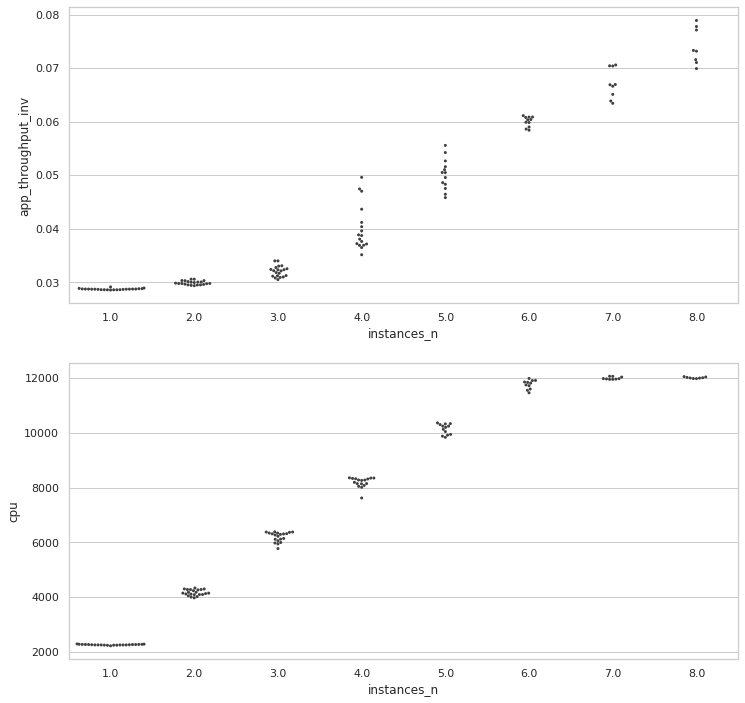

In [15]:
def swarmplot_two(var_1: str, var_2: str, df: pd.DataFrame):
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=False, figsize=(12,12))
    sns.swarmplot(x='instances_n', y=var_1, data=df, ax=ax1, color='.25', size=3)
    sns.swarmplot(x='instances_n', y=var_2, data=df, ax=ax2, color='.25', size=3)


swarmplot_two('app_throughput_inv', 'cpu', df)

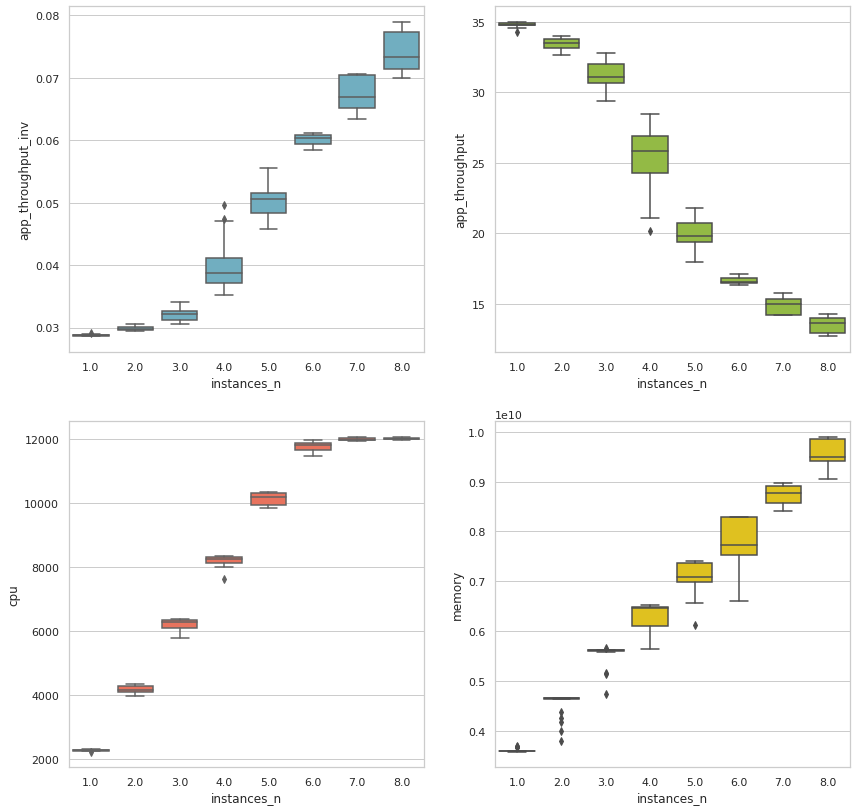

In [6]:
from typing import List
from itertools import (
    product,
    cycle,
)

COLORS = ['c', 'yellowgreen', 'tomato', 'gold']

def boxplot_grid(var_names: List[List[str]], df: pd.DataFrame):
    n = len(var_names)
    m = len(var_names[0])
    fig, axes = plt.subplots(nrows=n, ncols=m, sharex=False, figsize=(14,14))
    
    for (i, j), color in zip(product(range(n), range(m)), cycle(COLORS)):
        sns.boxplot(x='instances_n', y=var_names[i][j], data=df, ax=axes[i, j], color=color)


boxplot_grid([['app_throughput_inv', 'app_throughput'], ['cpu', 'memory']], df)

In [16]:
def boxplot_grid(var_names: List[List[str]], dfs: List[List[pd.DataFrame]], titles: List[List[str]], ylabels: List[List[str]]):
    n = len(var_names)
    m = len(var_names[0])
    fig, axes = plt.subplots(nrows=n, ncols=m, sharex=False, figsize=(14,14))
    
    for (i, j), color in zip(product(range(n), range(m)), cycle(COLORS)):
        ax = sns.boxplot(x='instances_n', y=var_names[i][j], data=dfs[i][j], ax=axes[i, j], color=color, showfliers = False)
        if titles:
            try:
                ax.set_title(titles[i][j])
            except IndexError:
                ax.set_title('')
        if ylabels:
            try:
                ax.set_ylabel(ylabels[i][j])
            except IndexError:
                ax.set_ylabel('')

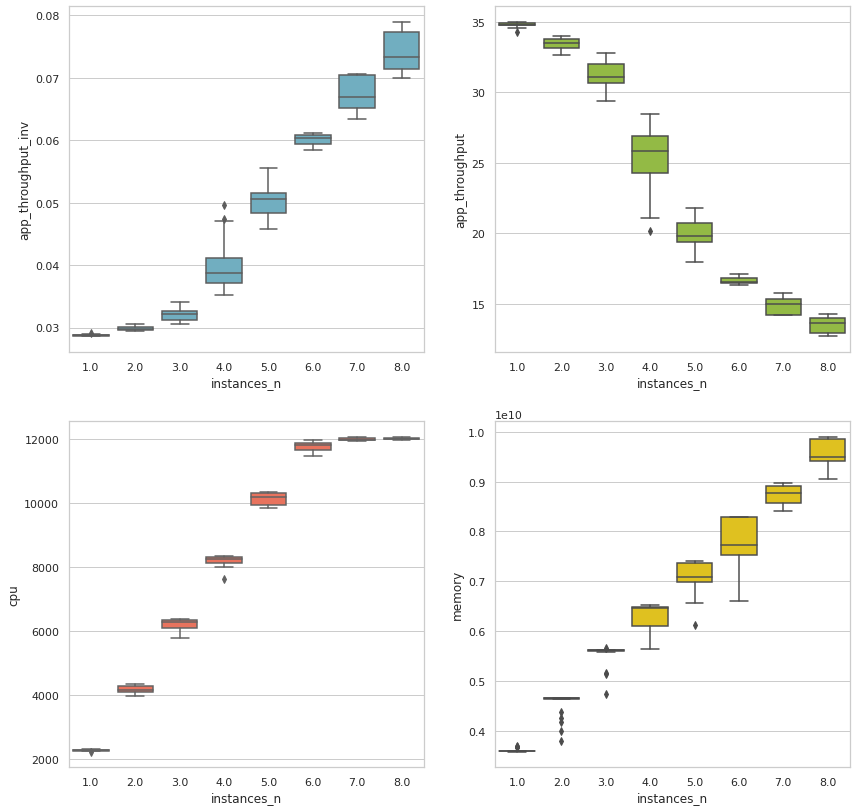

In [8]:
boxplot_grid(var_names=[['app_throughput_inv', 'app_throughput'], ['cpu', 'memory']],
             dfs=[[df, df], [df, df]], titles=None, ylabels=None)

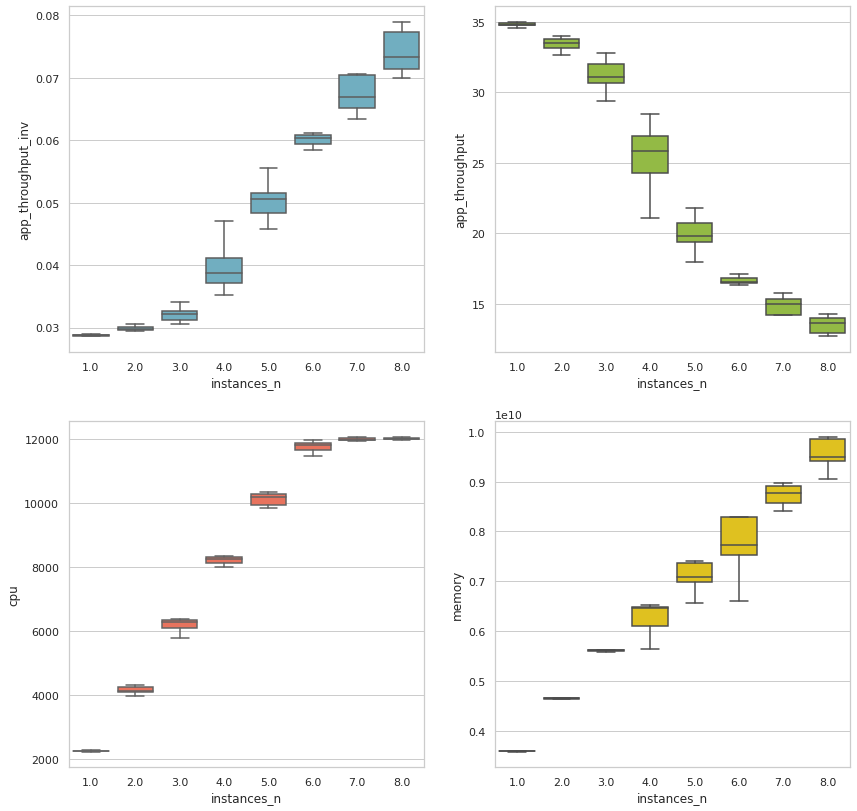

In [17]:
boxplot_grid(var_names=[['app_throughput_inv', 'app_throughput'], ['cpu', 'memory']],
             dfs=[[df, df], [df, df]], titles=None, ylabels=None)